<a href="https://colab.research.google.com/github/shimohiro/EU_M_Math-Repository/blob/master/Chap03_Cm_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#データファイルのダウンロード

In [5]:
mkdir chap3Cm

mkdir: cannot create directory ‘chap3Cm’: File exists


In [6]:
cd ./chap3Cm

/content/chap3Cm


In [8]:
import requests, zipfile
from io import StringIO
import io

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [11]:
import pandas as pd

student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


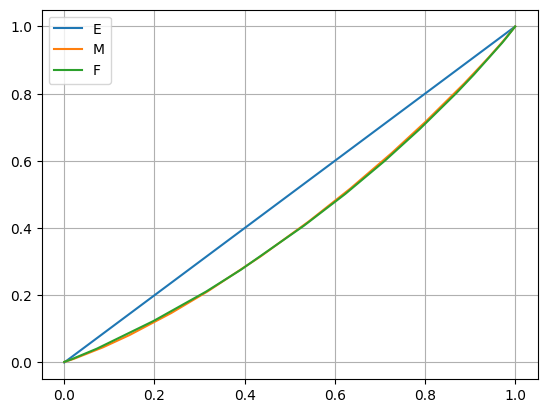

In [15]:
#総合問題3-2-1
student_data_math_M = student_data_math[student_data_math.sex == 'M']
student_data_math_F = student_data_math[student_data_math.sex == 'F']

data_G1_M = student_data_math_M.G1.sort_values()
data_G1_F = student_data_math_F.G1.sort_values()

import numpy as np

len_M = np.arange(len(data_G1_M))
len_F = np.arange(len(data_G1_F))

#図
import matplotlib.pyplot as plt

plt.plot(len_M/len_M.max(), len_M/len_M.max(), label='E')
plt.plot(len_M/len_M.max(), data_G1_M.cumsum()/data_G1_M.sum(), label='M')
plt.plot(len_F/len_F.max(), data_G1_F.cumsum()/data_G1_F.sum(), label='F')
plt.legend()
plt.grid(True)

In [18]:
#総合問題3-2-2
def heikinsa(data):
    subt = []
    for i in range(0, len(data)-1):
        for j in range(i+1, len(data)):
            subt.append(np.abs(data[i] - data[j]))
    return float(sum(subt))*2 / (len(data)**2)

def gini(heikinsa, data):
    return heikinsa / (2*np.mean(data))

gini_index_M = gini(heikinsa(np.array(data_G1_M)), np.array(data_G1_M))
gini_index_F = gini(heikinsa(np.array(data_G1_F)), np.array(data_G1_F))

print('男性の数学の成績に関するジニ関数：', gini_index_M)
print('女性の数学の成績に関するジニ関数：', gini_index_F)

男性の数学の成績に関するジニ関数： 0.17197351667939903
女性の数学の成績に関するジニ関数： 0.1723782950865341
